In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0-rc1


In [2]:
#Pulling data from github 
url = 'https://raw.githubusercontent.com/Mshire130/Ml-datasets/master/zoo.csv'
df = pd.read_csv(url)
df.head() 

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
class_dict = {
    0 : 'Mammal',
    1 : 'Bird',
    2 : 'Reptile',
    3 : 'Fish',
    4 : 'Amphibian',
    5 : 'Bug',
    6 : 'Invertebrate'
} 

class_dict[5]

'Bug'

In [4]:
#Checking for any NaN values within the dataframe
df.isnull().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [0]:
#Splitting the sample into train and test data 
train_data = df.sample(frac=0.7, random_state=0)
test_data = df.drop(train_data.index)

train_data['class_type'] = train_data['class_type'] - 1
test_data['class_type'] = test_data['class_type'] - 1 


In [0]:
train_label = train_data['class_type']
train_label.columns = ['Index','class_type']

In [0]:
#To remove animal_name category as its useless when being used to categorize the animals
train_label = train_data.pop('class_type')
test_label = test_data.pop('class_type') 

train_label1 = train_data.pop('animal_name')
test_label1 = test_data.pop('animal_name')

In [8]:
#Creating model
model = keras.Sequential ([
    keras.layers.Dense(64, activation = tf.nn.relu, input_shape = [len(train_data.keys())]),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(7, activation = tf.nn.softmax)
    
])

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

W0622 00:03:02.267216 140362279524224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1


In [11]:
model.fit(train_data,train_label,epochs=50)

Epoch 1/50
71/71 [==============================] - 0s 1ms/sample - loss: 2.0244 - acc: 0.0000e+00
Epoch 2/50
71/71 [==============================] - 0s 119us/sample - loss: 1.8554 - acc: 0.1972
Epoch 3/50
71/71 [==============================] - 0s 124us/sample - loss: 1.7168 - acc: 0.4225
Epoch 4/50
71/71 [==============================] - 0s 119us/sample - loss: 1.5852 - acc: 0.5493
Epoch 5/50
71/71 [==============================] - 0s 114us/sample - loss: 1.4682 - acc: 0.5634
Epoch 6/50
71/71 [==============================] - 0s 93us/sample - loss: 1.3631 - acc: 0.5775
Epoch 7/50
71/71 [==============================] - 0s 96us/sample - loss: 1.2696 - acc: 0.6056
Epoch 8/50
71/71 [==============================] - 0s 87us/sample - loss: 1.1817 - acc: 0.6620
Epoch 9/50
71/71 [==============================] - 0s 92us/sample - loss: 1.1076 - acc: 0.7183
Epoch 10/50
71/71 [==============================] - 0s 91us/sample - loss: 1.0346 - acc: 0.7606
Epoch 11/50
71/71 [=============

In [17]:
#Evaluating loss and accuracy of model when using it on test dataset
test_loss, test_acc = model.evaluate(test_data,test_label)

30/30 [==============================] - 0s 691us/sample - loss: 0.3891 - acc: 0.9333


In [0]:
predictions = model.predict(test_data)

In [60]:
test_label_check = test_label.reset_index()
test_label_check = test_label_check['class_type']
test_label_check.head()



0    0
1    3
2    1
3    1
4    4
Name: class_type, dtype: int64

In [63]:
#Checking class of prediction
class_dict[np.argmax(predictions[1])]

'Fish'

In [62]:
#Verifying predicted class acgainst the actual class
class_dict[test_label_check[1]]

'Fish'

In [0]:
#Function to verify prediction
def prediction_check(i, predictions, test_label_check):
  if class_dict[np.argmax(predictions[i])] ==  class_dict[test_label_check[i]]:
    return f'Prediction Successful! Animal Category : {class_dict[test_label_check[i]]}'
  else:
    "Prediction Unsuccessful"

In [84]:
prediction_check(6, predictions, test_label_check)

'Prediction Successful! Animal Category : Mammal'

In [0]:
def prediction_bar(i, predictions, test_label_check, class_dict):
  predictions, test_label_check = predictions[i], test_label_check[i]
  index = [0,1,2,3,4,5,6]
  thisplot = plt.bar(index, predictions.tolist())
  plt.xticks(np.arange(0,7, step =1), ('Mammal','Bird','Reptile','fish','Amphibian','Bug','Invertebrate'), rotation = 20)
  
  
  if class_dict[np.argmax(predictions)] ==  class_dict[test_label_check]:
    plt.title(f'{round(100*np.amax(predictions))}% {class_dict[np.argmax(predictions)]}', color = 'green')
  else:
    plt.title(f'{round(100*np.amax(predictions))}% {class_dict[np.argmax(predictions)]}', color = 'red')

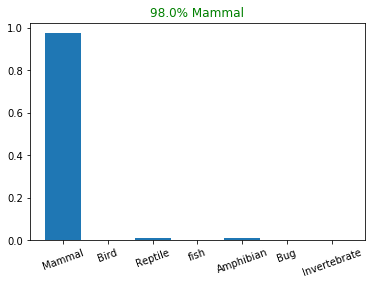

In [94]:
prediction_bar(6, predictions, test_label_check, class_dict)

In [0]:
#Next thing to do is possibly plot all 30 'Test' prediction bar graphs. Verifying whether the predictions are correct or not. 